# Lab 03 - Linear Regression의 cost 최소화의 TensorFlow 구현

-3.0 74.6667
-2.9000000000000004 70.98
-2.8000000000000003 67.3867
-2.7 63.8867
-2.6 60.48
-2.5 57.1667
-2.4000000000000004 53.9467
-2.3000000000000003 50.82
-2.2 47.7867
-2.1 44.8467
-2.0 42.0
-1.9000000000000001 39.2467
-1.8 36.5867
-1.7000000000000002 34.02
-1.6 31.5467
-1.5 29.1667
-1.4000000000000001 26.88
-1.3 24.6867
-1.2000000000000002 22.5867
-1.1 20.58
-1.0 18.6667
-0.9 16.8467
-0.8 15.12
-0.7000000000000001 13.4867
-0.6000000000000001 11.9467
-0.5 10.5
-0.4 9.14667
-0.30000000000000004 7.88667
-0.2 6.72
-0.1 5.64667
0.0 4.66667
0.1 3.78
0.2 2.98667
0.30000000000000004 2.28667
0.4 1.68
0.5 1.16667
0.6000000000000001 0.746667
0.7000000000000001 0.42
0.8 0.186667
0.9 0.0466667
1.0 0.0
1.1 0.0466667
1.2000000000000002 0.186667
1.3 0.42
1.4000000000000001 0.746666
1.5 1.16667
1.6 1.68
1.7000000000000002 2.28667
1.8 2.98667
1.9000000000000001 3.78
2.0 4.66667
2.1 5.64667
2.2 6.72
2.3000000000000003 7.88667
2.4000000000000004 9.14667
2.5 10.5
2.6 11.9467
2.7 13.4867
2.8000000000000

/home/amazingguni/.pyenv/versions/3.5.2/envs/deeplearning/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/amazingguni/.pyenv/versions/3.5.2/envs/deeplearning/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


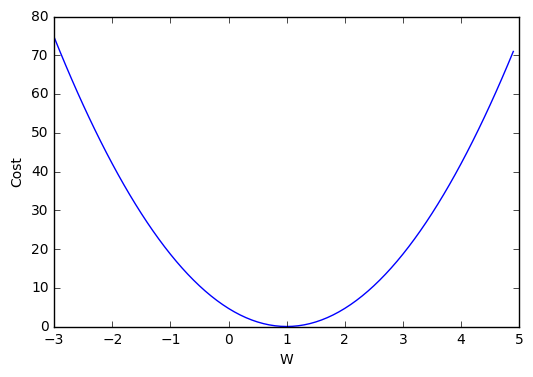

In [10]:
import tensorflow as tf

X = [1., 2., 3.]
Y = [1., 2., 3.]
m = n_samples = len(X)

W = tf.placeholder(tf.float32)

hypothesis = tf.mul(X, W)

cost = tf.reduce_sum(tf.pow(hypothesis-Y, 2))/(m)

init = tf.initialize_all_variables()

W_val = []
cost_val = []

sess = tf.Session()
sess.run(init)

for i in range(-30, 50):
    current_cost = sess.run(cost, feed_dict={W:i*0.1})
    print(i*0.1, sess.run(cost, feed_dict={W:i*0.1}))
    W_val.append(i*0.1)
    cost_val.append(current_cost)

import matplotlib.pyplot as plt
plt.plot(W_val, cost_val)
plt.ylabel('Cost')
plt.xlabel('W')
plt.show()

In [13]:
import tensorflow as tf

x_data = [1., 2., 3.]
y_data = [1., 2., 3.]


W = tf.Variable(tf.random_uniform([1], -10.0, 10.0))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X

cost = tf.reduce_mean(tf.square(hypothesis-Y))

descent = W-tf.mul(0.1, tf.reduce_mean(tf.mul((tf.mul(W,X)-Y),X)))
update = W.assign(descent)

init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

for i in range(20):
    sess.run(update, feed_dict={X:x_data, Y:y_data})
    print (step, sess.run(cost, feed_dict={X:x_data, Y:y_data}), sess.run(W))


19 129.865 [-4.27523994]
19 36.9393 [-1.81346154]
19 10.5072 [-0.50051284]
19 2.98871 [ 0.19972652]
19 0.850122 [ 0.57318747]
19 0.241812 [ 0.77236664]
19 0.0687822 [ 0.87859553]
19 0.0195647 [ 0.93525094]
19 0.00556508 [ 0.96546715]
19 0.00158296 [ 0.98158246]
19 0.000450263 [ 0.99017733]
19 0.000128075 [ 0.99476123]
19 3.64307e-05 [ 0.99720597]
19 1.03631e-05 [ 0.99850982]
19 2.94754e-06 [ 0.99920523]
19 8.38592e-07 [ 0.99957609]
19 2.38551e-07 [ 0.99977392]
19 6.7837e-08 [ 0.99987942]
19 1.92947e-08 [ 0.99993569]
19 5.50062e-09 [ 0.99996567]


In [14]:
import tensorflow as tf

# data set
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

# try to find values for w and b that compute y_data = W * x_data + b
# range is -100 ~ 100
W = tf.Variable(tf.random_uniform([1], -10000., 10000.))

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# my hypothesis
hypothesis = W * X

# Simplified cost function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# minimize
descent = W - tf.mul(0.1, tf.reduce_mean(tf.mul( ( tf.mul(W, X) - Y ), X ), ))
update = W.assign(descent)

# before starting, initialize the variables
init = tf.initialize_all_variables()

# launch
sess = tf.Session()
sess.run(init)

# fit the line
for step in range(20):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print (step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

print( sess.run(hypothesis, feed_dict={X: 5}))
print( sess.run(hypothesis, feed_dict={X: 2.5}))

0 2.59481e+06 [ 589.86303711]
1 162176.0 [ 148.71575928]
2 10136.2 [ 38.42893982]
3 633.666 [ 10.85723495]
4 39.7604 [ 3.96430874]
5 2.64127 [ 2.24107718]
6 0.32133 [ 1.81026936]
7 0.176333 [ 1.70256734]
8 0.167271 [ 1.67564178]
9 0.166704 [ 1.6689105]
10 0.166669 [ 1.66722763]
11 0.166667 [ 1.66680694]
12 0.166667 [ 1.66670179]
13 0.166667 [ 1.66667545]
14 0.166667 [ 1.66666889]
15 0.166667 [ 1.66666722]
16 0.166667 [ 1.66666675]
17 0.166667 [ 1.66666675]
18 0.166667 [ 1.66666675]
19 0.166667 [ 1.66666675]
[ 8.33333397]
[ 4.16666698]
